## Problem statement

This dataset gives a number of variables along with a target condition of having or not having heart disease. We will try to build a model which will let us predict, whether the patient is having CHD or not(binary classification problem). 

*Source of the dataset:* https://archive.ics.uci.edu/ml/datasets/heart+disease

## Loading and understanding the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Loading

In [2]:
data = pd.read_csv('/Users/Wera/Desktop/Machine Learning /heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### First look at features

Let's take a look at info which is provided by features in this dataset. We have 14 features:

- **age** - the age of patient given in years

- **sex** - 1 = male, 0 = female

- **cp** - chest pain type 

- **trestbps** - resting blood pressure(in mmHg)

- **chol** - serum cholesterol in mg/dl 

- **fbs** - fasting blood sugar > 120 mg/dl?

- **restecg** - resting electrocardiographic results

- **thalach** - maximum heart rate achieved

- **exang** - exercise induced angina?

- **oldpeak** - ST depression induced by exercise relative to rest 

- **slope** - the slope of the peak exercise ST segment(1 - upsloping, 2 - flat, 3 - downsloping)

- **ca** - number of major vessels (0-3) colored by flourosopy

- **thal** - 3 = normal, 6 = fixed defect, 7 = reversable defect 

- **target** - presence of cardiovascular disease

## Exploratory Data Analysis

### Descriptive statistics

In [3]:
pd.set_option("display.float", "{:.3f}".format)
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.366,0.683,0.967,131.624,246.264,0.149,0.528,149.647,0.327,1.040,1.399,0.729,2.314,0.545
std,9.082,0.466,1.032,17.538,51.831,0.356,0.526,22.905,0.470,1.161,0.616,1.023,0.612,0.499
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,47.500,0.000,0.000,120.000,211.000,0.000,0.000,133.500,0.000,0.000,1.000,0.000,2.000,0.000
50%,55.000,1.000,1.000,130.000,240.000,0.000,1.000,153.000,0.000,0.800,1.000,0.000,2.000,1.000
75%,61.000,1.000,2.000,140.000,274.500,0.000,1.000,166.000,1.000,1.600,2.000,1.000,3.000,1.000
max,77.000,1.000,3.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,2.000,4.000,3.000,1.000


### Distribution of target

In [4]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

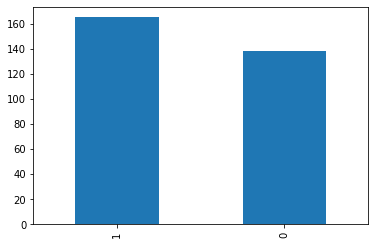

In [5]:
data.target.value_counts().plot(kind="bar")

### Distributions of certain features

In [6]:
data_sex = data.groupby(["sex","target"]).size()
data_sex

sex  target
0    0          24
     1          72
1    0         114
     1          93
dtype: int64

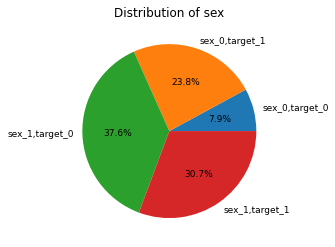

In [7]:
plt.pie(data_sex.values, labels = ["sex_0,target_0", "sex_0,target_1", "sex_1,target_0", "sex_1,target_1"],autopct='%1.1f%%',radius = 1, textprops = {"fontsize" : 9})
plt.title("Distribution of sex")
plt.show()

The ratio of male has heart disease is higher than female.

Let's see what are distributions of age, cholesterol levels, resting blood pressure and maximum heart rate.

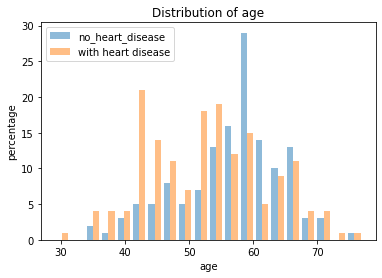

In [8]:
plt.hist([data[data.target==0].age, data[data.target==1].age], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("age")
plt.ylabel("percentage")
plt.legend()
plt.title("Distribution of age")
plt.show()

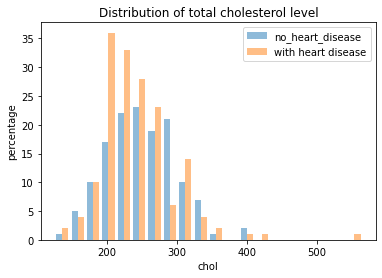

In [9]:
plt.hist([data[data.target==0].chol, data[data.target==1].chol], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("chol")
plt.ylabel("percentage")
plt.legend()
plt.title("Distribution of total cholesterol level")
plt.show()

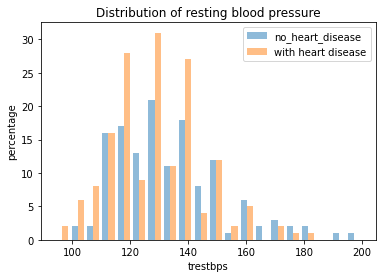

In [10]:
plt.hist([data[data.target==0].trestbps, data[data.target==1].trestbps], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("trestbps")
plt.ylabel("percentage")
plt.legend()
plt.title("Distribution of resting blood pressure")
plt.show()

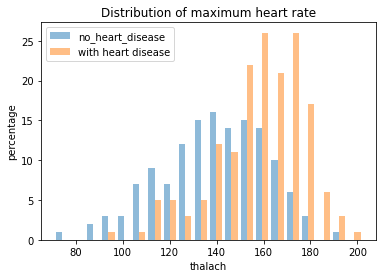

In [11]:
plt.hist([data[data.target==0].thalach, data[data.target==1].thalach], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("thalach")
plt.ylabel("percentage")
plt.legend()
plt.title("Distribution of maximum heart rate")
plt.show()

**Conclusions**:

- There are only a few cases of CHD in a group of people under 40. After that age the risk gradually rises. 

- The most heart diseases are noticed in people with cholesterol in interval [200, 300].

- Blood pressure under 120 mmHg is correlated with lower ratio of CHD. 

- Many patients with maximum heart rate higher than 150 and lower than 190 have heart disease.

### Correlation matrix analysis

Let's take a look at correlation matrix.

Text(0.5, 1.0, 'Correlation matrix')

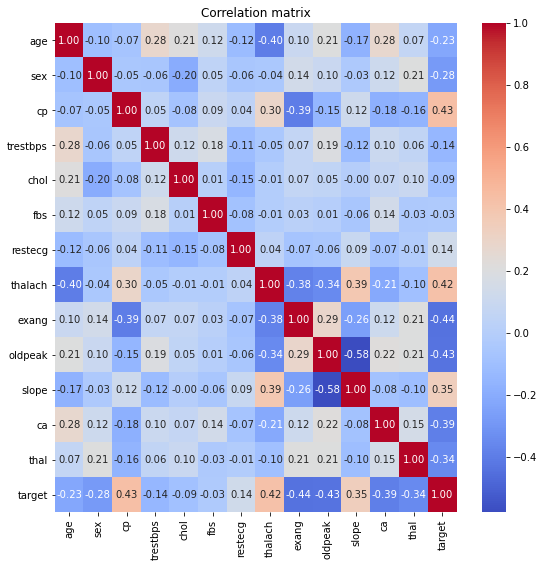

In [12]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(9, 9))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 fmt=".2f",
                 cmap="coolwarm")
ax.set_title('Correlation matrix')

<AxesSubplot:title={'center':'Correlation with target'}>

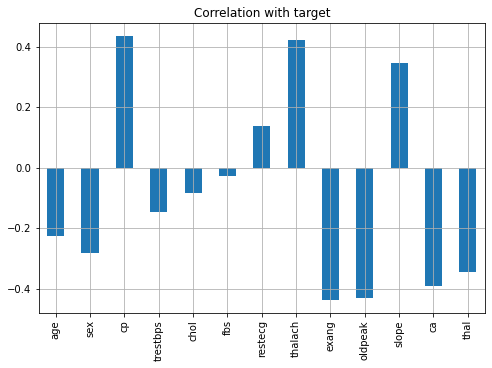

In [13]:
data.drop('target', axis=1).corrwith(data.target).plot(kind='bar',
                                                       grid=True, 
                                                       figsize=(8, 16/3), 
                                                       title="Correlation with target")

**Conclusions**:

- fbs and chol have negligible correlation with target

- other features have significant correlation with target

- age is positively correlated with all features except heart rate

### Data preprocessing

Let's check for null values in the dataset.

In [14]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

As we can see there are no null values but let's find out what about outliers. Firstly, we need to seperate continuous data from discrete one.

In [15]:
cont_data = data[["age", "trestbps", "chol", "thalach", "oldpeak"]]
cont_data.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000,303.000,303.000,303.000,303.000
mean,54.366,131.624,246.264,149.647,1.040
std,9.082,17.538,51.831,22.905,1.161
min,29.000,94.000,126.000,71.000,0.000
25%,47.500,120.000,211.000,133.500,0.000
50%,55.000,130.000,240.000,153.000,0.800
75%,61.000,140.000,274.500,166.000,1.600
max,77.000,200.000,564.000,202.000,6.200


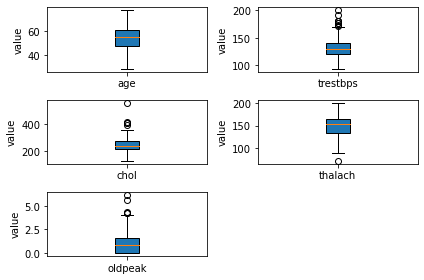

In [16]:
for item in cont_data.columns:
    plt.subplot(3, 2, list(cont_data.columns).index(item)+1)
    plt.boxplot(cont_data[item], patch_artist =True, labels = [item])
    plt.ylabel("value")
plt.tight_layout()
plt.show()

As we can see, there are outliers in every continuous feature except age. We are going to use Z-Score method for outlier removal.

Z-score is calculated by subtracting each value with the mean of data and normalizing it by standard deviation.

$z = \frac{x-\mu}{\sigma}$

Any z which holds $|z|>3$ is considered as an outlier.

In [17]:
data = data[(np.abs(stats.zscore(data)) < 3).all(axis = 1)]

In [18]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,287.000,287.000,287.000,287.000,287.000,287.000,287.000,287.000,287.000,287.000,287.000,287.000,287.000,287.000
mean,54.334,0.690,0.972,131.024,244.502,0.143,0.533,149.805,0.328,1.005,1.411,0.659,2.314,0.551
std,9.093,0.463,1.037,16.992,45.921,0.351,0.527,22.551,0.470,1.081,0.607,0.925,0.585,0.498
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,88.000,0.000,0.000,0.000,0.000,1.000,0.000
25%,47.000,0.000,0.000,120.000,211.000,0.000,0.000,133.500,0.000,0.000,1.000,0.000,2.000,0.000
50%,55.000,1.000,1.000,130.000,241.000,0.000,1.000,153.000,0.000,0.800,1.000,0.000,2.000,1.000
75%,61.000,1.000,2.000,140.000,274.000,0.000,1.000,166.000,1.000,1.600,2.000,1.000,3.000,1.000
max,77.000,1.000,3.000,180.000,394.000,1.000,2.000,202.000,1.000,4.400,2.000,3.000,3.000,1.000


### Splitting the data into train/test set and feature scaling

In [19]:
X = data.drop("target", axis = 1)
y = data["target"]

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

Finally we finished preprocessing. It's time for making use of the data.

## Applying machine learning algorithms

### Logistic regression

We will use Grid Search for hyperparameter tuning.

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


grid_values = {'penalty' : ['l1', 'l2'],
               'C' : [0.01,0.1,1,10,100],
               'class_weight' : ['balanced',None]}
log_reg = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid = grid_values, cv = 10)
log_reg.fit(X_train, y_train)
pred_log_reg = log_reg.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, pred_log_ reg))
print("Accuracy of logistic regression on this dataset is: {:.3f}".format(accuracy_score(y_test, pred_log_reg)))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        27
           1       0.84      0.84      0.84        45

    accuracy                           0.81        72
   macro avg       0.79      0.79      0.79        72
weighted avg       0.81      0.81      0.81        72

Accuracy of logistic regression on this dataset is: 0.806


<AxesSubplot:>

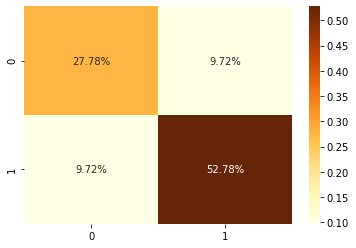

In [31]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, pred_log_reg)
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, 
            fmt='.2%', cmap='YlOrBr')

### Support Vector Machine

In [24]:
from sklearn.svm import SVC

grid_values = {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000],
                    'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
svc = GridSearchCV(SVC(), param_grid = grid_values, cv = 10)
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [25]:
print(classification_report(y_test, pred_svc))
print("Accuracy of Support Vector Classifier on this dataset is: {:.3f}".format(accuracy_score(y_test, pred_svc)))b

              precision    recall  f1-score   support

           0       0.75      0.78      0.76        27
           1       0.86      0.84      0.85        45

    accuracy                           0.82        72
   macro avg       0.81      0.81      0.81        72
weighted avg       0.82      0.82      0.82        72

Accuracy of Support Vector Classifier on this dataset is: 0.819


<AxesSubplot:>

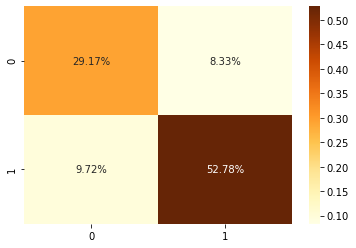

In [32]:
conf_matrix = confusion_matrix(y_test, pred_svc)
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, 
            fmt='.2%', cmap='YlOrBr')

### Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

grid_values = {'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [3, 4, 5],
    'n_estimators': [100, 200, 300, 1000]}

rand_forest = GridSearchCV(RandomForestClassifier(), param_grid = grid_values)
rand_forest.fit(X_train, y_train)
pred_rand_forest = rand_forest.predict(X_test)

In [29]:
print(classification_report(y_test, pred_rand_forest))
print("Accuracy of Random Forest Classifier on this dataset is: {:.3f}".format(accuracy_score(y_test, pred_rand_forest)))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74        27
           1       0.86      0.80      0.83        45

    accuracy                           0.79        72
   macro avg       0.78      0.79      0.78        72
weighted avg       0.80      0.79      0.79        72

Accuracy of Random Forest Classifier on this dataset is: 0.792


<AxesSubplot:>

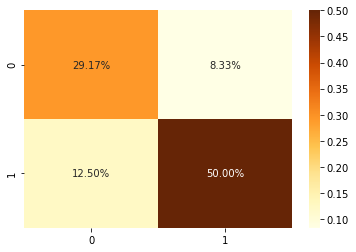

In [33]:
conf_matrix = confusion_matrix(y_test, pred_rand_forest)
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, 
            fmt='.2%', cmap='YlOrBr')

## Results

- Support Vector Classifier has the best accuracy, precision, recall and F1 score

- it has the same TP and FN score as Random Forest and the same TF and FP score as Logistic Regression

Thus, we can state that SVC is the best model for this datset(out of 3 algorithms which we compared).